# VISION

In [1]:
from visionpy.api import start_vision
from visionpy import signatures_from_gmt
from visionpy import compute_signatures_anndata

In [2]:
%load_ext autoreload
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore')
import os
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.backend_bases
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mudata import MuData
import mudata

import tarfile
import warnings
from glob import glob

import anndata
import muon as mu
import pandas as pd
import scanpy as sc

In [3]:
adata = sc.read_h5ad('02_dex_annotated_cd8.h5ad')

In [ ]:
adata.varm["OWN_signatures"] = signatures_from_gmt(["Datasets_Vision/OWN_PATHWAYS_VISION.gmt"], adata)
adata.varm["KEGG_signatures"] = signatures_from_gmt(["Datasets_Vision/c2.cp.kegg_legacy.v2025.1.Hs.symbols.gmt"], adata)
adata.varm["GOBP_signatures"] = signatures_from_gmt(["Datasets_Vision/c5.go.bp.v2025.1.Hs.symbols.gmt"], adata)

['GLUTAMINE_CATABOLISM', 'SLC1A5', 'GLS', 'GLS2', 'GLUD1']
['GLUTAMINE_CATABOLISM', 'GLUL']
['POLYAMINE_SYNTHESIS', 'ODC1', 'SRM', 'SMS', 'AMD1']
['POLYAMINE_SYNTHESIS', 'SMOX', 'SAT1', 'PAOX', 'OAZ1']
['AMINOACID_UPTAKE', 'SLC1A5', 'SLC7A1', 'SLC7A5']
['MEVALONATE_PATHWAY', 'ACAT2', 'HMGCS1', 'HMGCR', 'MVK', 'PMVK', 'IDI1', 'IDI2']
['PI3K-AKT-MTOR-MYC_SIGNALING', 'PIK3CD', 'AKT1', 'AKT2', 'RHEB', 'MTOR', 'CRTC2', 'MYC']
['PI3K-AKT-MTOR-MYC_SIGNALING', 'PTEN', 'TSC1', 'TSC2', 'GSK3B']
['METHIONINE_CYCLE', 'SMS', 'SRM', 'AMD1', 'MTR', 'MTAP', 'MAT1A', 'MAT2A', 'MAT2B', 'AHCYL1', 'AHCYL2', 'AHCY', 'DNMT1', 'DNMT3A', 'DNMT3B', 'ARMT1', 'ASMT', 'BHMT2', 'CARNMT1', 'COMTD1', 'GAMT', 'MEPCE', 'N6AMT1', 'NOP2', 'PCMT1', 'PEMT', 'PRMT7', 'PRMT8', 'SUV39H1', 'TPMT', 'TRMT2B']
['HIF_PATHWAY', 'ARNT', 'ASPH', 'COPS5', 'CREB1', 'EDN1', 'EP300', 'EPO', 'HIF1A', 'HSP90AA1', 'JUN', 'LDHA', 'NOS3', 'P4HB', 'VEGFA', 'VHL']
['ARGININE-PROLINE_METABOLISM', 'ACY1', 'AGMAT', 'ALDH18A1', 'ALDH1B1', 'ALDH2',

In [ ]:
#Namen einfügen
adata.uns["OWN_signature_names"] = adata.varm["OWN_signatures"].columns.tolist()
adata.uns["KEGG_signature_names"] = adata.varm["KEGG_signatures"].columns.tolist()
adata.uns["GOBP_signature_names"] = adata.varm["GOBP_signatures"].columns.tolist()

In [ ]:
#compute signatures - OWN
compute_signatures_anndata(adata, norm_data_key=None, signature_varm_key='OWN_signatures', 
                           signature_names_uns_key='OWN_signature_names')
adata.obsm['OWN_vision_signatures'] = adata.obsm['vision_signatures']

#compute signatures - KEGG
compute_signatures_anndata(adata, norm_data_key=None, signature_varm_key='KEGG_signatures', 
                           signature_names_uns_key='KEGG_signature_names')
adata.obsm['KEGG_vision_signatures'] = adata.obsm['vision_signatures']

#compute signatures - GOBP
compute_signatures_anndata(adata, norm_data_key=None, signature_varm_key='GOBP_signatures', 
                           signature_names_uns_key='GOBP_signature_names')
adata.obsm['GOBP_vision_signatures'] = adata.obsm['vision_signatures']

In [10]:
adata.obsm['OWN_vision_signatures']

glutamine_catabolism  polyamine_synthesis  \
AAACCTGAGTGTTGAA-1-initial-0-0             -0.365515            -1.626545   
AAACCTGCACCAGGCT-1-initial-0-0             -0.350952            -1.955980   
AAACCTGCATACGCTA-1-initial-0-0             -0.452064            -0.407435   
AAACGGGAGATGTGGC-1-initial-0-0              1.136481            -0.706148   
AAACGGGGTACGAAAT-1-initial-0-0             -0.364347            -1.076017   
...                                              ...                  ...   
TTTGCGCTCTCTGAGA-1-2-1                      0.630114             0.777841   
TTTGGTTGTTCGGGCT-1-2-1                     -0.368851             0.581566   
TTTGGTTTCCACGACG-1-2-1                      0.925978            -2.269164   
TTTGTCACAGCTGCAC-1-2-1                     -0.370449            -2.084162   
TTTGTCATCCTATGTT-1-2-1                     -0.397526             0.000000   

                                aminoacid_uptake  mevalontate_pathway  \
AAACCTGAGTGTTGAA-1-initial-0-0         -0.471878            -0.667336   
AAACCTGCACCAGGCT-1-initial-0-0         -0.453077            -0.640748   
AAACCTGCATACGCTA-1-initial-0-0         -0.583612            -0.825352   
AAACGGGAGATGTGGC-1-initial-0-0         -0.408579             0.748551   
AAACGGGGTACGAAAT-1-initial-0-0         -0.470371            -0.665204   
...                                          ...                  ...   
TTTGCGCTCTCTGAGA-1-2-1                  0.813474            -0.719388   
TTTGGTTGTTCGGGCT-1-2-1                  2.774641            -0.673426   
TTTGGTTTCCACGACG-1-2-1                  1.195432            -0.678677   
TTTGTCACAGCTGCAC-1-2-1                 -0.478247             1.030869   
TTTGTCATCCTATGTT-1-2-1                  1.058814            -0.725780   

                                pi3k_akt_mtor_myc_signaling  methionine_cycle  \
AAACCTGAGTGTTGAA-1-initial-0-0                     2.947979          0.623309   
AAACCTGCACCAGGCT-1-initial-0-0                     0.688352          1.228912   
AAACCTGCATACGCTA-1-initial-0-0                     0.836055          3.269066   
AAACGGGAGATGTGGC-1-initial-0-0                     0.766215          0.650033   
AAACGGGGTACGAAAT-1-initial-0-0                    -0.245643          0.346017   
...                                                     ...               ...   
TTTGCGCTCTCTGAGA-1-2-1                            -0.956126          1.980145   
TTTGGTTGTTCGGGCT-1-2-1                            -0.248679         -0.891810   
TTTGGTTTCCACGACG-1-2-1                             1.499206          1.239476   
TTTGTCACAGCTGCAC-1-2-1                            -0.249757         -0.855306   
TTTGTCATCCTATGTT-1-2-1                             1.373907          1.367945   

                                hif_pathway  arginine-proline_metabolism  \
AAACCTGAGTGTTGAA-1-initial-0-0     1.776704                    -0.653373   
AAACCTGCACCAGGCT-1-initial-0-0     1.795581                     0.579179   
AAACCTGCATACGCTA-1-initial-0-0     0.988206                     0.300417   
AAACGGGAGATGTGGC-1-initial-0-0     0.853993                     0.296078   
AAACGGGGTACGAAAT-1-initial-0-0     2.849282                    -0.017668   
...                                     ...                          ...   
TTTGCGCTCTCTGAGA-1-2-1             3.614116                     0.438867   
TTTGGTTGTTCGGGCT-1-2-1             3.020164                    -0.646457   
TTTGGTTTCCACGACG-1-2-1             4.533383                     1.965667   
TTTGTCACAGCTGCAC-1-2-1             2.349988                    -1.093666   
TTTGTCATCCTATGTT-1-2-1             2.555482                     0.456247   

                                apoptosis  quiescence  cytotoxicity  \
AAACCTGAGTGTTGAA-1-initial-0-0   0.380420    8.831191      0.003262   
AAACCTGCACCAGGCT-1-initial-0-0   0.225189   12.138448      0.304349   
AAACCTGCATACGCTA-1-initial-0-0   1.526639    8.796663      6.427774   
AAACGGGAGATGTGGC-1-initial-0-0   0.072695    8.256402     -0

In [11]:
# prepare data for heatmap

# put OWN results into adata
own_list = adata.obsm['OWN_vision_signatures'].columns.tolist()

for i in own_list:
    adata.obs[i] = adata.obsm['OWN_vision_signatures'][i]
    
# put KEGG results into adata
kegg_list = adata.obsm['KEGG_vision_signatures'].columns.tolist()

for i in kegg_list:
    adata.obs[i] = adata.obsm['KEGG_vision_signatures'][i]
    
# put GOBP results into adata
GOBP_list = adata.obsm['GOBP_vision_signatures'].columns.tolist()

for i in GOBP_list:
    adata.obs[i] = adata.obsm['GOBP_vision_signatures'][i]
    
# put Immune results into adata
#immune_list = adata.obsm['Immune_vision_signatures'].columns.tolist()

#for i in immune_list:
#    adata.obs[i] = adata.obsm['Immune_vision_signatures'][i]

In [12]:
selected = pd.read_csv('Datasets_Vision/selected_pathways.csv', header=None)
selected = [x.lower() for x in selected[0].to_list()]
to_remove = ['gocc_mitochondrion', 
             'gobp_respiratory_electron_transport_chain', 
             'gobp_nad_biosynthesis_via_nicotinamide_riboside_salvage_pathway', 
             'gocc_ribosomal_subunit', 
             'gocc_cytosolic_ribosome', 
             'fatty_acid_synthesis', 
             'mevalonate_pathway', 
             'pi3k-akt-mtor-myc_signaling']

selected = [x for x in selected if x not in to_remove]
selected

['aminoacid_uptake',
 'apoptosis',
 'arginine-proline_metabolism',
 'cytotoxicity',
 'glutamine_catabolism',
 'gobp_cellular_response_to_retinoic_acid',
 'gobp_fatty_acid_beta_oxidation',
 'gobp_fatty_acid_elongation',
 'gobp_mitochondrial_translation',
 'gobp_nad_metabolic_process',
 'gobp_nadh_metabolic_process',
 'gobp_response_to_endoplasmic_reticulum_stress',
 'gobp_retinoic_acid_receptor_signaling_pathway',
 'gobp_ribosome_biogenesis',
 'gobp_t_cell_activation',
 'gobp_t_cell_differentiation',
 'gobp_t_cell_proliferation',
 'gobp_translational_elongation',
 'gobp_translational_initiation',
 'hif_pathway',
 'ifn_signaling',
 'kegg_abc_transporters',
 'kegg_adherens_junction',
 'kegg_adipocytokine_signaling_pathway',
 'kegg_alanine_aspartate_and_glutamate_metabolism',
 'kegg_aldosterone_regulated_sodium_reabsorption',
 'kegg_alpha_linolenic_acid_metabolism',
 'kegg_amino_sugar_and_nucleotide_sugar_metabolism',
 'kegg_aminoacyl_trna_biosynthesis',
 'kegg_antigen_processing_and_prese

In [13]:
# create dataframe for heatmap over time in specific cells and with cite/leiden annotation
cols = ['time', 'binding_ct', 'leiden_CD8'] + selected
df = adata.obs[cols]
df
df.to_csv('Data/VISION_scores_short_SARS.csv')

In [14]:
df = df[df['binding_ct'].isin(['KCYGVSPTK', 'LTDEMIAQY', 'YLQPRTFLL', 'No binding'])]
df.to_csv('Data/VISION_scores_shorter_SARS.csv')

In [15]:
#time
table = pd.DataFrame(columns=['pathway', 'P1', 'S1', 'S2', 'S3', 'T1', 'T2', 'T3'])
for i in selected:
    row = pd.DataFrame(df.groupby('time')[str(i)].mean()).T
    row.insert(0, 'pathway', i)
    table = pd.concat([table, row], ignore_index=True)
table
table.to_csv('Data/Vision_scores_over_time_specific_cells_SARS.csv')

In [17]:
#all specific - leiden

table_leiden = pd.DataFrame(columns=['pathway', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

for i in selected:
    row = pd.DataFrame(df.groupby('leiden_CD8')[str(i)].mean()).T
    row.insert(0, 'pathway', i)
    table_leiden = pd.concat([table_leiden, row], ignore_index=True)
table_leiden

table_leiden.to_csv('Data/Vision_scores_over_all_specific_cells_leiden_SARS.csv')

In [8]:
adata2 = adata[adata.obs['binding_ct'].isin(['KCYGVSPTK', 'LTDEMIAQY', 'YLQPRTFLL', 'No binding'])].copy()

adata2.obs['specific'] = np.where(
    adata2.obs['binding_ct'].isin(['KCYGVSPTK', 'LTDEMIAQY', 'YLQPRTFLL']),
    'SARS',
    'no_binding'
)

print(adata2.obs['specific'].value_counts())

specific
no_binding    52271
SARS            885
Name: count, dtype: int64


In [19]:
adata_pathways = ann.AnnData(
    X=adata2.obs[selected].to_numpy(),
    obs=adata2.obs.copy(),
    var=pd.DataFrame(index=selected)
)

In [24]:
###analysis over clusters, specific cells all times
adata_sub = adata_pathways[(adata_pathways.obs['specific']=='SARS') & (adata_pathways.obs['leiden_CD8'].isin(['0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11']))].copy()
sc.tl.rank_genes_groups(
    adata_sub, 
    groupby='leiden_CD8', 
    reference='rest', 
    method='wilcoxon',
    key_added='specific_all_time'
)

result = adata_sub.uns["specific_all_time"]
groups = result["names"].dtype.names

dfs = []
for g in groups:
    df = pd.DataFrame({
        "names": result["names"][g],
        "scores": result["scores"][g],
        "logfoldchanges": result["logfoldchanges"][g],
        "pvals": result["pvals"][g],
        "pvals_adj": result["pvals_adj"][g]
    })
    df["group"] = g 
    dfs.append(df)

results_df = pd.concat(dfs).reset_index(drop=True)

results_df.to_csv('Data/SARS_specific_all_times_vs_all.csv')
results_df


names    scores  \
0                                          cytotoxicity  6.685390   
1               kegg_taurine_and_hypotaurine_metabolism  6.453353   
2                         kegg_linoleic_acid_metabolism  5.412190   
3                  kegg_alpha_linolenic_acid_metabolism  4.571398   
4                kegg_ascorbate_and_aldarate_metabolism  4.446918   
...                                                 ...       ...   
1575  kegg_glycosphingolipid_biosynthesis_lacto_and_... -2.501315   
1576              kegg_regulation_of_actin_cytoskeleton -2.682086   
1577                  kegg_cell_adhesion_molecules_cams -3.061311   
1578                    kegg_hematopoietic_cell_lineage -3.161521   
1579                                      kegg_ribosome -3.289240   

      logfoldchanges         pvals     pvals_adj group  
0           4.396689  2.303100e-11  3.638898e-09     0  
1          -0.192099  1.094018e-10  8.642740e-09     0  
2          -0.066954  6.225836e-08  2.459205e-06     0  
3          -0.120969  4.844803e-06  7.654788e-05     0  
4          -0.140256  8.711130e-06  1.251235e-04     0  
...              ...           ...           ...   ...  
1575        0.552819  1.237329e-02  1.646385e-01    11  
1576       -3.238406  7.316464e-03  1.284446e-01    11  
1577       -3.153649  2.203698e-03  5.803070e-02    11  
1578       -2.706100  1.569474e-03  5.803070e-02    11  
1579      -25.723898  1.004585e-03  5.290812e-02    11  

[1580 rows x 6 columns]

In [26]:
###analysis over clusters, specific cells at P1
adata_sub = adata_pathways[(adata_pathways.obs['specific']=='SARS') & 
                           (adata_pathways.obs['time']=='P1') &
                           (adata_pathways.obs['leiden_CD8'].isin(['1', '2', '3', '4', '6', '8', '10', '11']))].copy()
sc.tl.rank_genes_groups(
    adata_sub, 
    groupby='leiden_CD8', 
    reference='rest', 
    method='wilcoxon',
    key_added='specific_P1'
)

result = adata_sub.uns["specific_P1"]
groups = result["names"].dtype.names

dfs = []
for g in groups:
    df = pd.DataFrame({
        "names": result["names"][g],
        "scores": result["scores"][g],
        "logfoldchanges": result["logfoldchanges"][g],
        "pvals": result["pvals"][g],
        "pvals_adj": result["pvals_adj"][g]
    })
    df["group"] = g 
    dfs.append(df)

results_df = pd.concat(dfs).reset_index(drop=True)

results_df.to_csv('Data/SARS_specific_P1_vs_all.csv')
results_df


names    scores  logfoldchanges  \
0                                  quiescence  2.415948        3.155413   
1            kegg_basal_transcription_factors  2.239172        2.447426   
2                               kegg_ribosome  2.180246        8.236147   
3                kegg_regulation_of_autophagy  2.121320        2.125330   
4               kegg_linoleic_acid_metabolism  1.944544       -0.129812   
..                                        ...       ...             ...   
469                             kegg_ribosome -2.763033       -7.773777   
470                                quiescence -3.092948       -2.517248   
471  kegg_antigen_processing_and_presentation -3.134187       -2.597624   
472   kegg_taurine_and_hypotaurine_metabolism -3.464102        0.142217   
473             kegg_linoleic_acid_metabolism -3.752777        0.174722   

        pvals  pvals_adj group  
0    0.015694   0.232843     3  
1    0.025145   0.232843     3  
2    0.029239   0.232843     3  
3    0.033895   0.232843     3  
4    0.051830   0.284144     3  
..        ...        ...   ...  
469  0.005727   0.053225     8  
470  0.001982   0.027655     8  
471  0.001723   0.027228     8  
472  0.000532   0.014009     8  
473  0.000175   0.014009     8  

[474 rows x 6 columns]

## UMAP for Scores

In [6]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['darkblue', 'blue', 'lightblue', '#FFEA00', 'orange', 'red', 'darkred']
cust = LinearSegmentedColormap.from_list('custom_cmap', colors)
colormap = cust

colors_katha = ['#33378F', '#669AC7', '#BFE0EC', '#FDF8C0', '#FBBC6C', '#EB5638', '#A71D2B']
cust_katha = LinearSegmentedColormap.from_list('custom_cmap', colors_katha)

In [28]:
selected = pd.read_csv('Datasets_Vision/selected_pathways_Mimi2.csv', header=None)

In [29]:
selected = [x.lower() for x in selected[0].to_list()]
selected

['quiescence',
 'kegg_ribosome',
 'kegg_oxidative_phosphorylation',
 'kegg_glycolysis_gluconeogenesis',
 'kegg_base_excision_repair',
 'kegg_apoptosis',
 'gobp_t_cell_differentiation',
 'gobp_t_cell_activation',
 'gobp_t_cell_proliferation',
 'ifn_signaling',
 'cytotoxicity',
 'kegg_proteasome']

In [30]:
pw = pd.DataFrame(selected)
pw['vmin'] = [6, 40, 12, 1, -1, -2, 3, 6, 4, 4, 0, 2]
pw['vmax'] = [13, 65, 22, 6, 2.5, 3, 10, 14, 9, 18, 10, 10]
pw.set_index(pw.columns[0], inplace=True)
pw.index.name=None

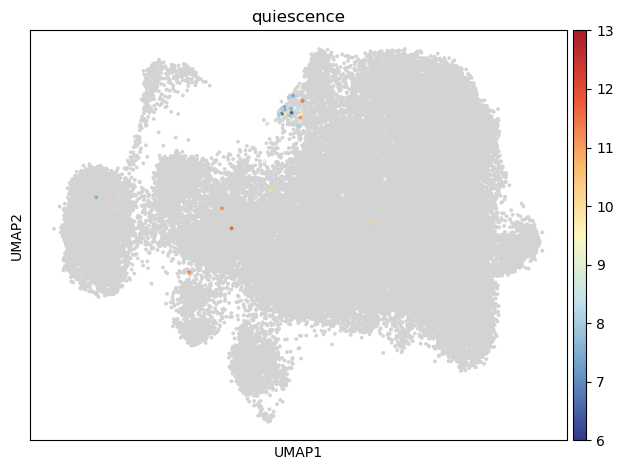

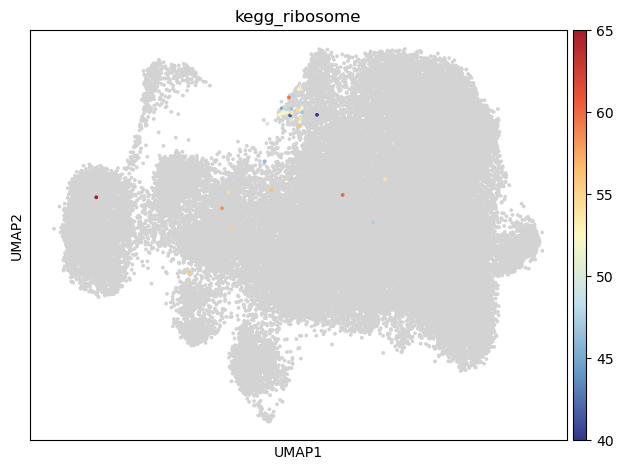

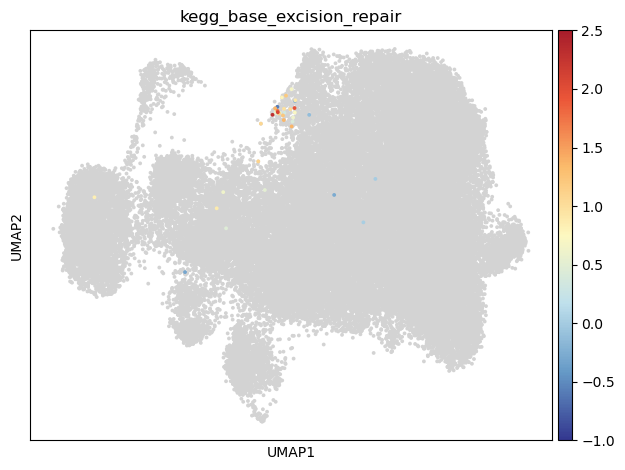

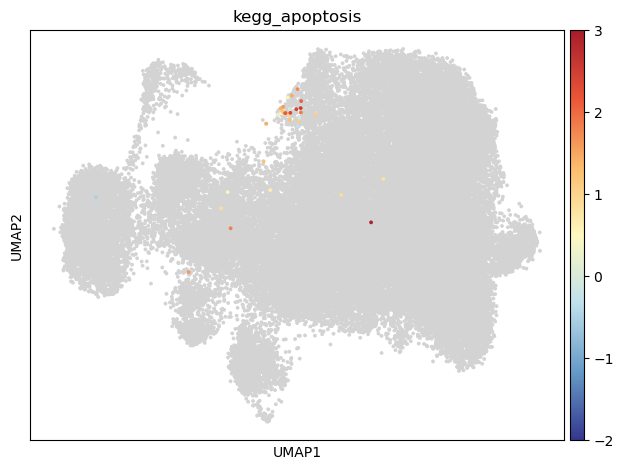

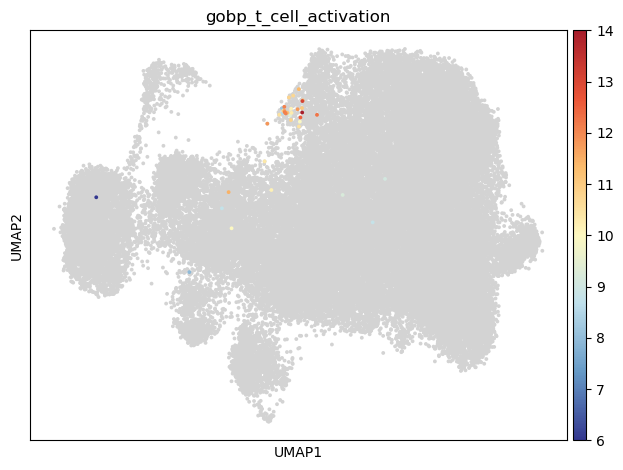

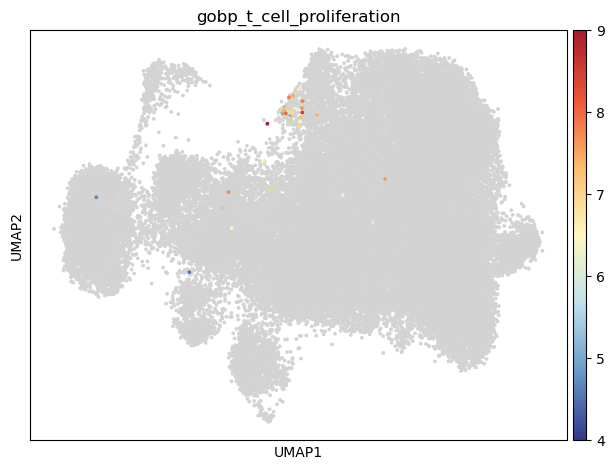

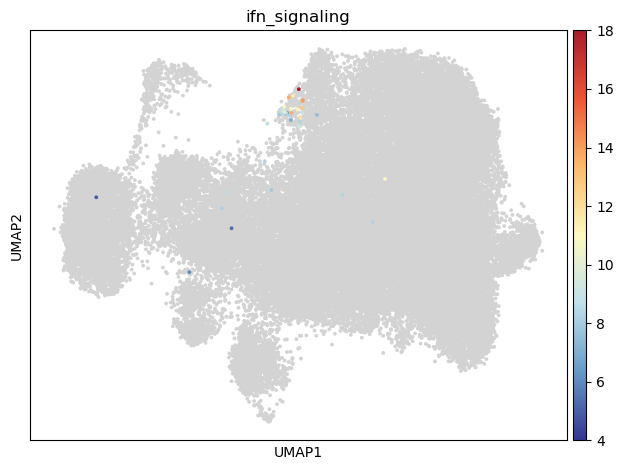

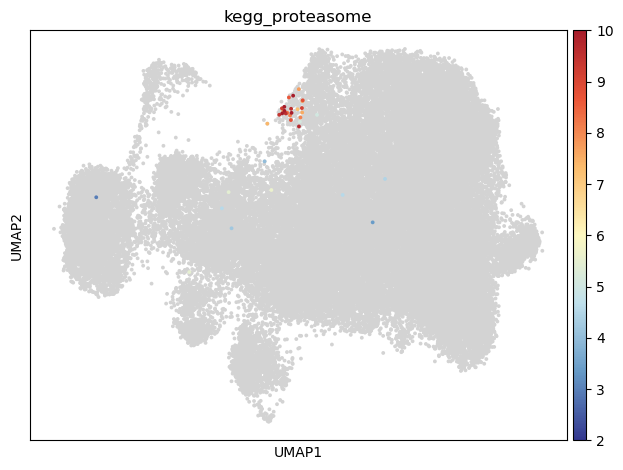

In [31]:
for i in pw.index:
    x = pw['vmax'][i]
    y = pw['vmin'][i]
    ax = sc.pl.umap(adata, cmap=cust, show=False, size=30)
    sc.pl.umap(adata2[(adata2.obs['specific']=='SARS')&(adata2.obs['time'].isin(['P1']))], color=i, 
           cmap=cust_katha, show=False, size=30, ax=ax, vmax=x, vmin=y)
    plt.tight_layout()
    plt.savefig(f"UMAPs/SARS_{i}_UMAP_P1_all_specific_cells.pdf", dpi=300, bbox_inches='tight')
    plt.show()


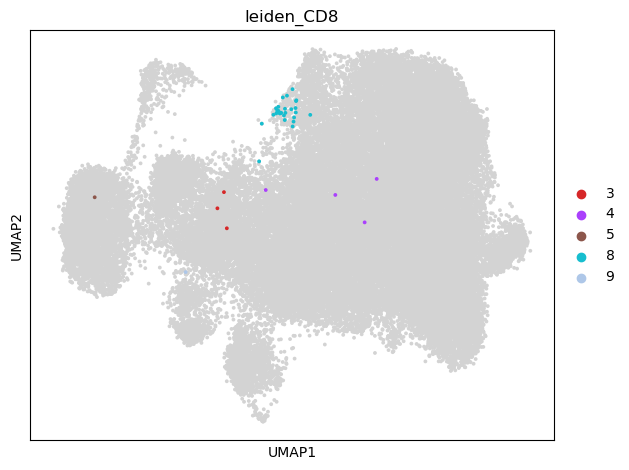

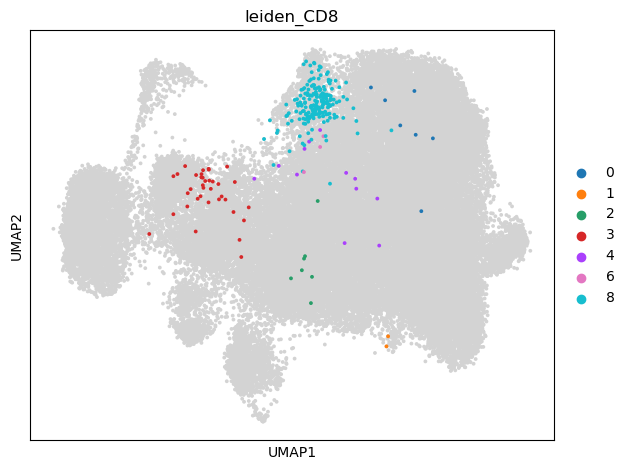

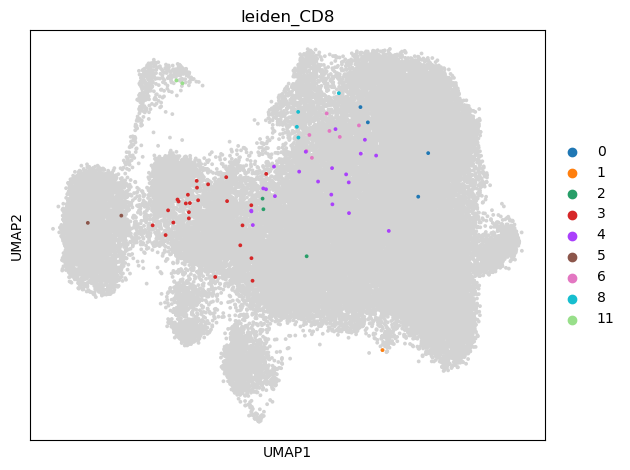

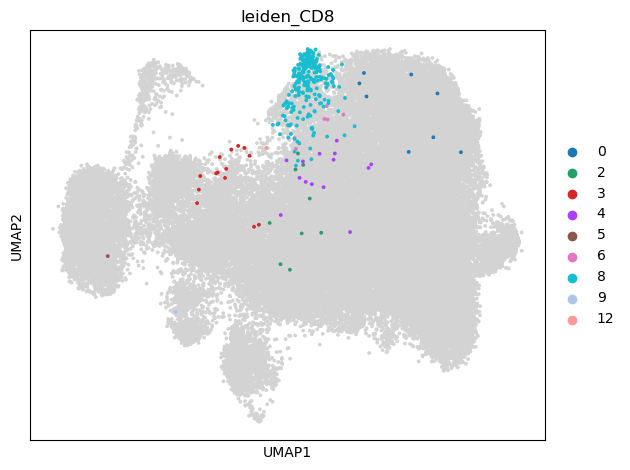

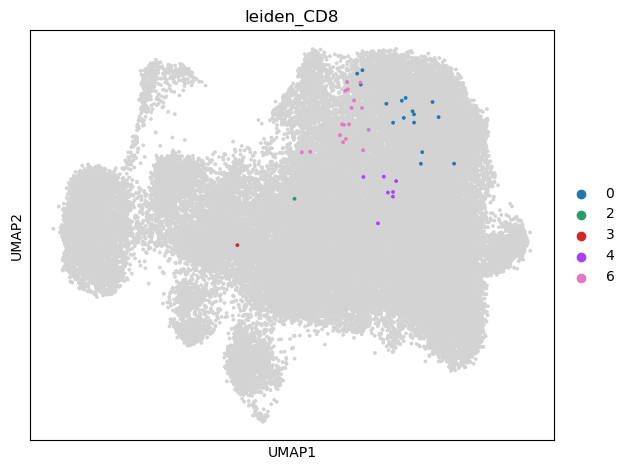

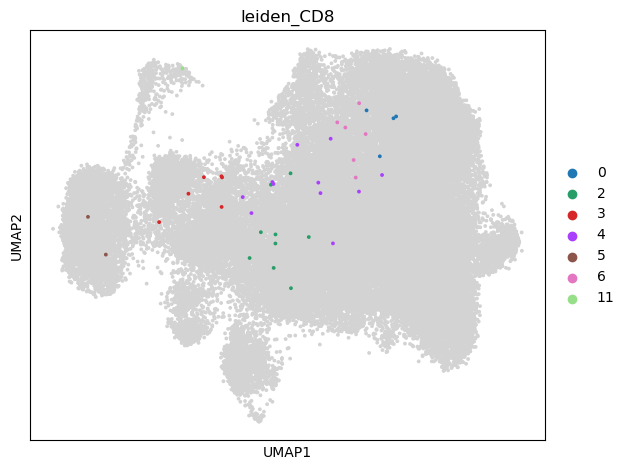

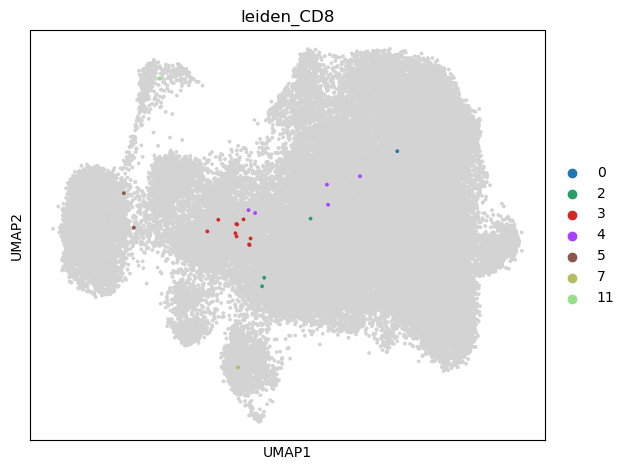

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


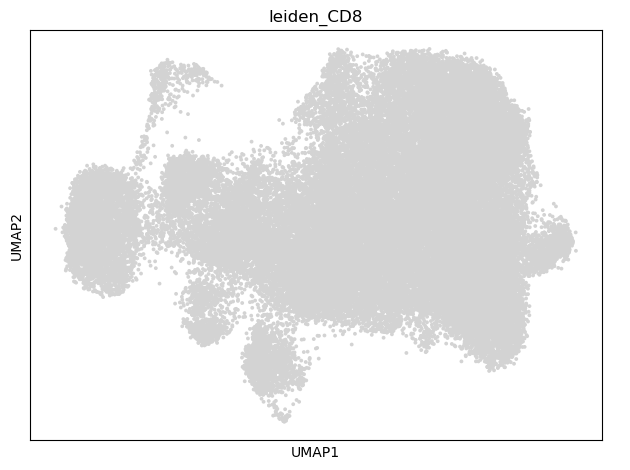

In [10]:
for i in adata.obs['time'].unique():
    ax = sc.pl.umap(adata, cmap=cust, show=False, size=30)
    sc.pl.umap(adata2[(adata2.obs['specific']=='SARS')&(adata2.obs['time']==i)], color='leiden_CD8', 
           cmap=cust_katha, show=False, size=30, ax=ax)
    plt.tight_layout()
    plt.savefig(f"UMAPs/SARS_UMAP_{i}_all_specific_cells.pdf", dpi=300, bbox_inches='tight')
    plt.show()

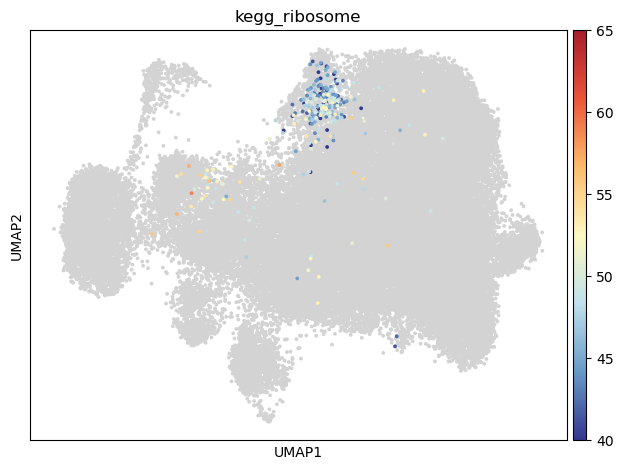

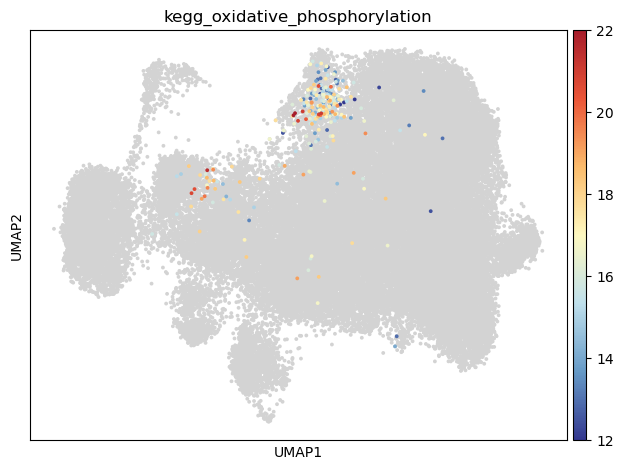

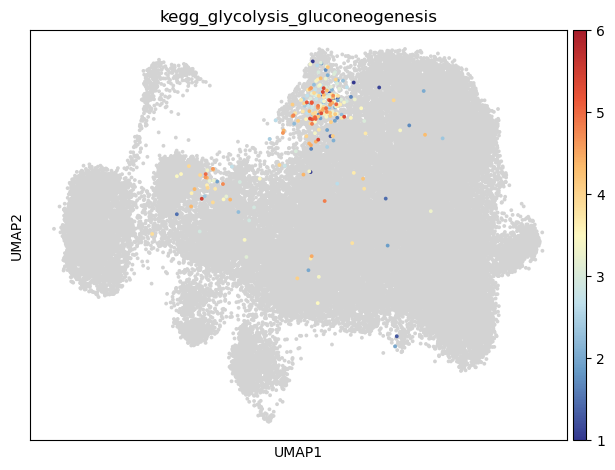

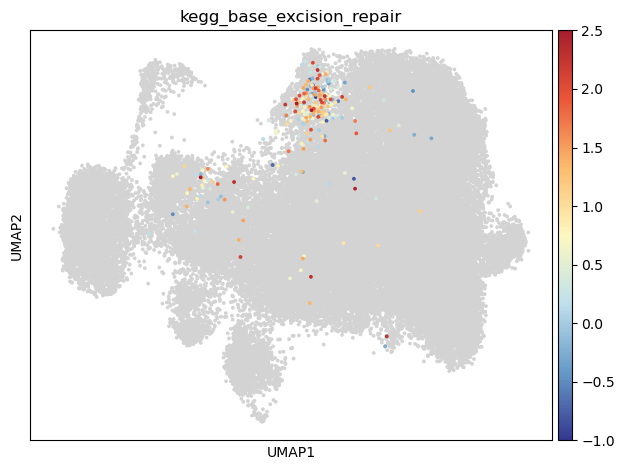

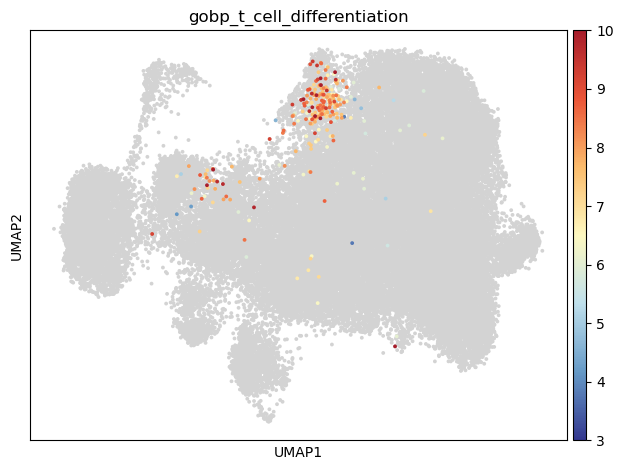

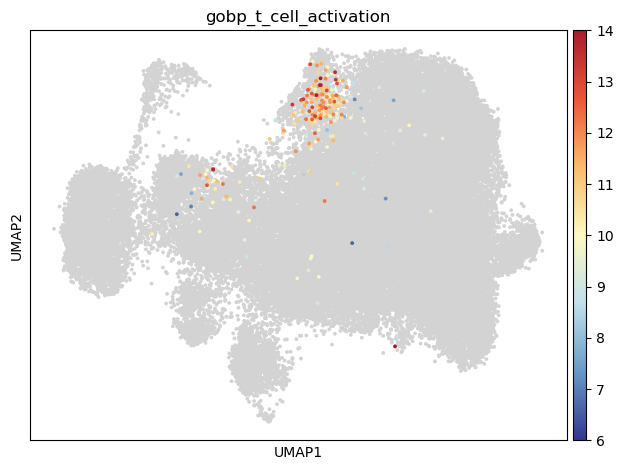

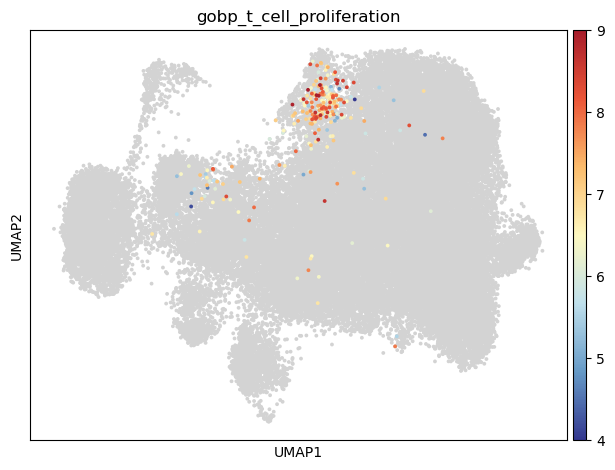

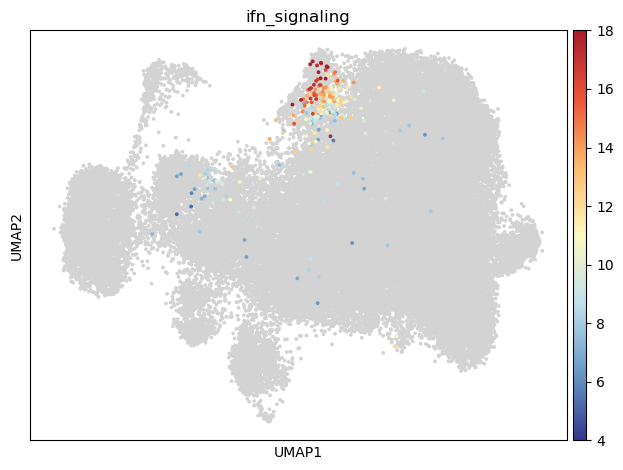

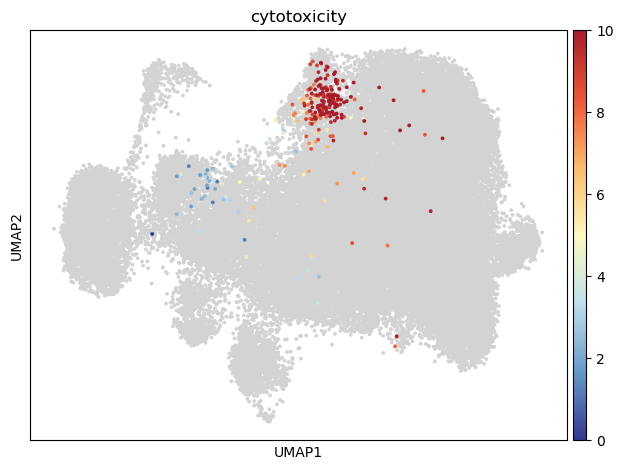

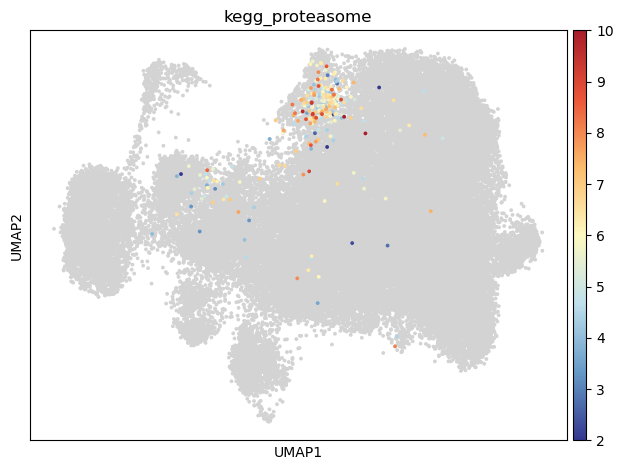

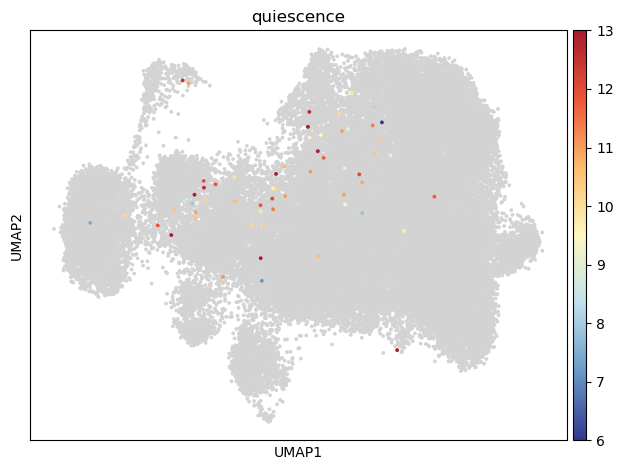

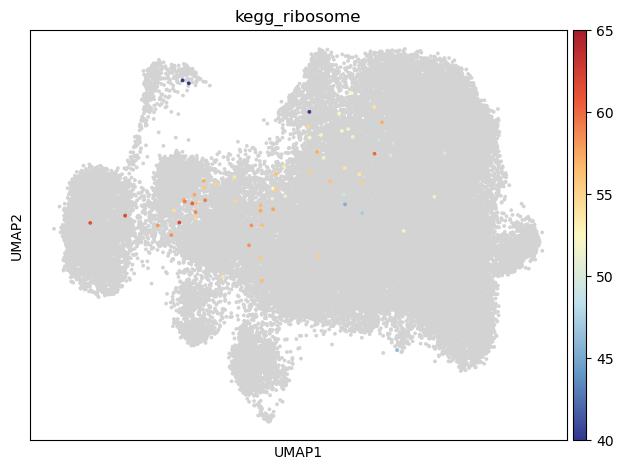

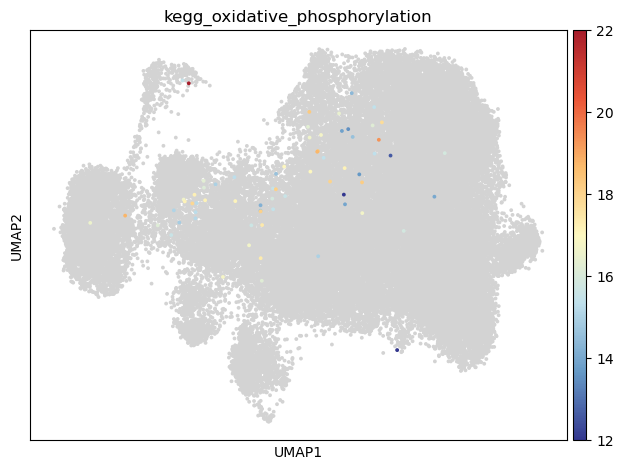

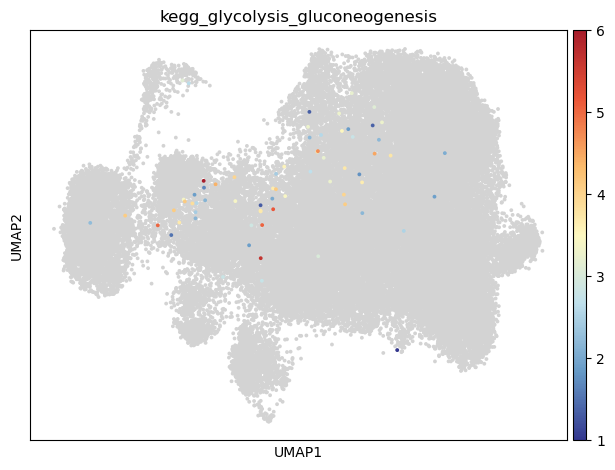

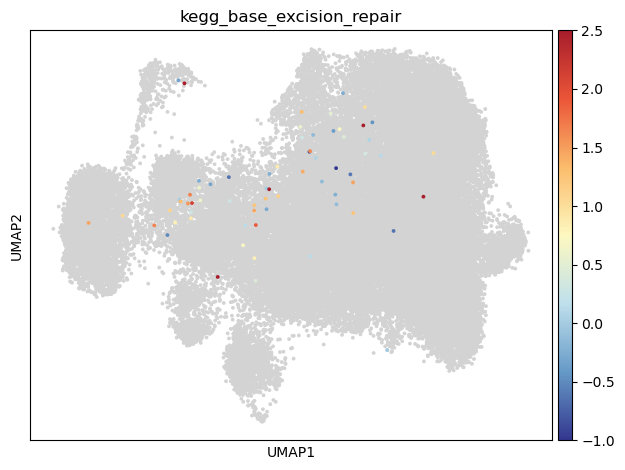

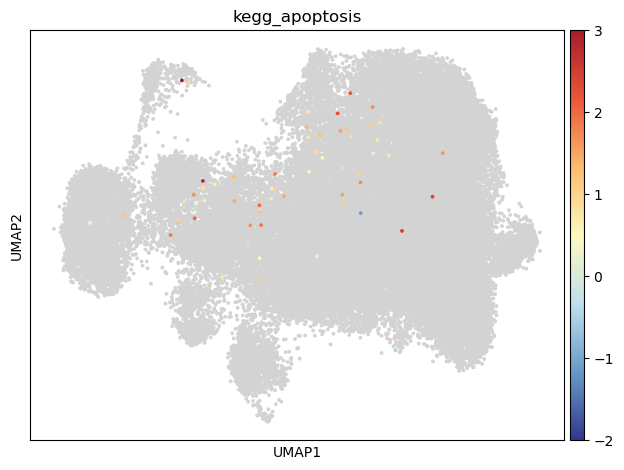

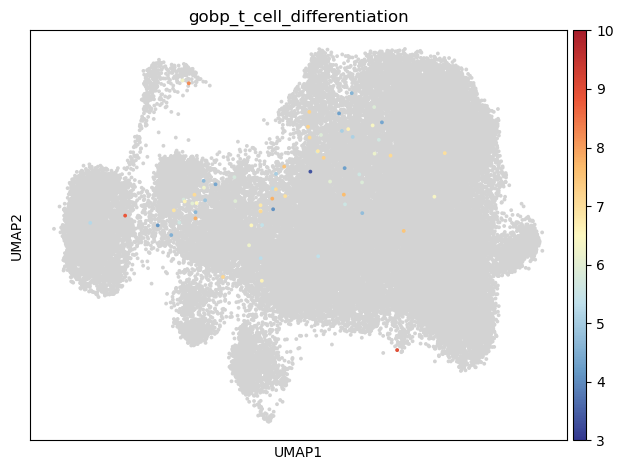

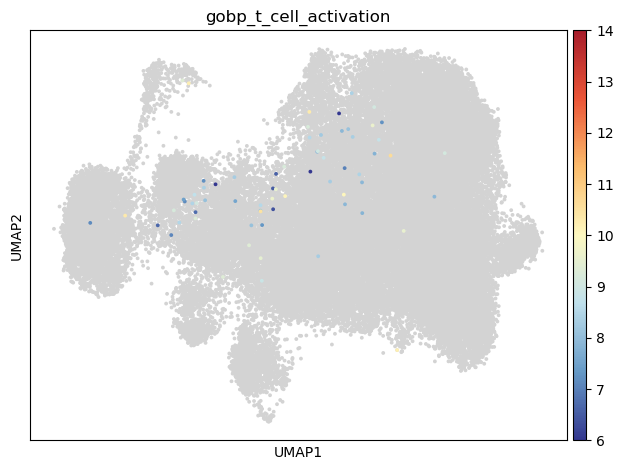

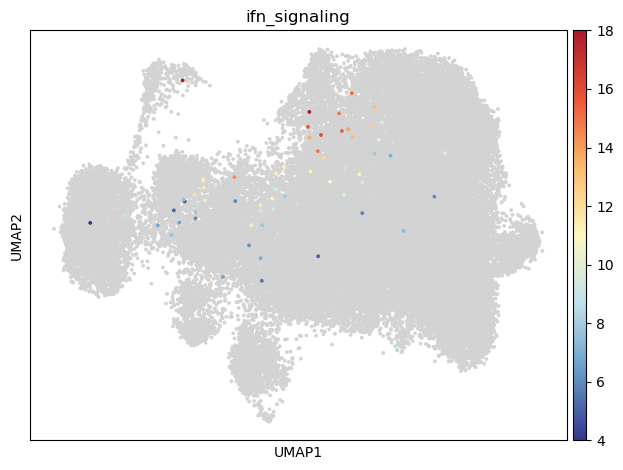

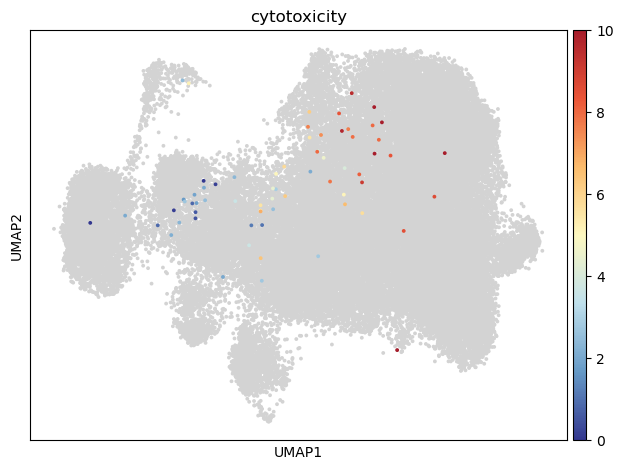

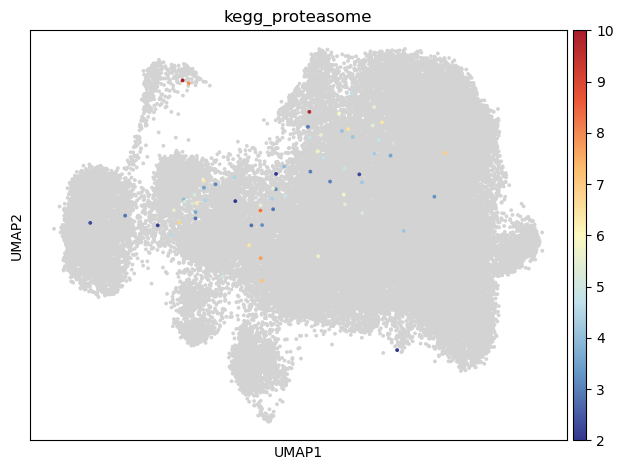

In [32]:
for i in pw.index:
    x = pw['vmax'][i]
    y = pw['vmin'][i]
    ax = sc.pl.umap(adata, cmap=cust, show=False, size=30)
    sc.pl.umap(adata2[(adata2.obs['specific']=='SARS')&(adata2.obs['time'].isin(['S1']))], color=i, 
           cmap=cust_katha, show=False, size=30, ax=ax, vmax=x, vmin=y)
    plt.tight_layout()
    plt.savefig(f"UMAPs/SARS_{i}_UMAP_S1_all_specific_cells.pdf", dpi=300, bbox_inches='tight')
    plt.show()

for i in pw.index:
    x = pw['vmax'][i]
    y = pw['vmin'][i]
    ax = sc.pl.umap(adata, cmap=cust, show=False, size=30)
    sc.pl.umap(adata2[(adata2.obs['specific']=='SARS')&(adata2.obs['time'].isin(['S3']))], color=i, 
           cmap=cust_katha, show=False, size=30, ax=ax, vmax=x, vmin=y)
    plt.tight_layout()
    plt.savefig(f"UMAPs/SARS_{i}_UMAP_S3_all_specific_cells.pdf", dpi=300, bbox_inches='tight')
    plt.show()    